<a href="https://colab.research.google.com/github/PaletteofDesign/classification_metrics/blob/main/classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task

We will use this dataset. The data, which was modified from this source, has information about direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The goal is to predict if the client will subscribe (yes: 1 or no: 0) to a term deposit (the target column is called 'y_yes' in this csv).

 Your task is to build a logistic regression model to predict whether or not a client will subscribe. Tune the hyperparameters to get the best model possible. Then, calculate the following classification metrics:

Metrics to calculate:

    Accuracy
    Sensitivity
    Specificity
    AUC ROC
    Additionally, plot the ROC.

Questions to think about and answer

After completing the task, answer the following questions:

    Which metric is going to be best to evaluate your classification model for this dataset and why? Hint: think about what each metric means in this specific scenario. 
    What metric is going to help the bank the most?
    Compare your model's accuracy with the baseline model. 
    Do you see any problems here?
    What are other ways you could improve this model?

In [1]:
# mount data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

In [3]:
f = '/content/bank_modified.csv'
df = pd.read_csv(f)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [5]:
df.nunique()

age                      67
balance                2353
duration                875
campaign                 32
pdays                   292
previous                 24
job_blue-collar           2
job_entrepreneur          2
job_housemaid             2
job_management            2
job_retired               2
job_self-employed         2
job_services              2
job_student               2
job_technician            2
job_unemployed            2
job_unknown               2
marital_married           2
marital_single            2
education_secondary       2
education_tertiary        2
education_unknown         2
default_yes               2
housing_yes               2
loan_yes                  2
y_yes                     2
dtype: int64

In [6]:
df['y_yes'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

In [7]:
X = df.drop(columns='y_yes')
y = df['y_yes']
print(X.shape)
print(y.shape)

(4521, 25)
(4521,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
unique, count = np.unique(y_train, return_counts=True)
dict(zip(unique, count))

{0: 2799, 1: 365}

In [10]:
unique, count = np.unique(y_test, return_counts=True)
dict(zip(unique, count))

{0: 1201, 1: 156}

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# baseline
y_train.value_counts(normalize=True)

0    0.88464
1    0.11536
Name: y_yes, dtype: float64

In [34]:
log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l1', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   n_jobs=None)

##AUC ROC

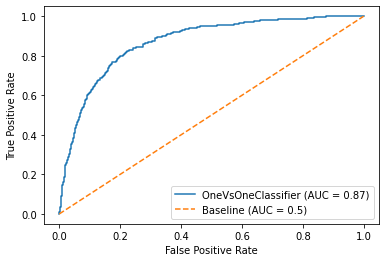

In [35]:
plot_roc_curve(ovo, X_train, y_train)
plt.plot([0, 1], [0,1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

##Accuracy

In [36]:
print('Training accuracy:', ovo.score(X_train, y_train))
print('Test accuracy:', ovo.score(X_test, y_test))

Training accuracy: 0.8919089759797725
Test accuracy: 0.8894620486366986


##Sensitivity

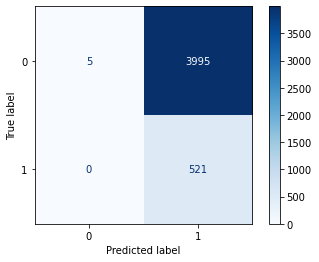

In [37]:
plot_confusion_matrix(ovo, X, y, cmap = 'Blues', values_format='.5g');

In [38]:
sensitivity = 5/(5+3995)
print(f'Sensitivity: {sensitivity}')

Sensitivity: 0.00125


## Specificity

In [39]:
specificity = 521/(521+0)
print(f'Specificity: {specificity}')

Specificity: 1.0


# Which metric is going to be best to evaluate your classification model for this dataset and why?

For this model I would choose the specificy. This is because it will provide the data needed to determine the amount of clients who did not subscribe with more accuracy. 

# What metric is going to help the bank the most?

Specificity

## Compare your model's accuracy with the baseline model.

Baseline accuracy: 

  0    0.88464

  1    0.11536

Model accuracy: 

  Training: 0.8919089759797725

  Test: 0.8894620486366986

## Do you see any problems here?

The data is very unbalanced. This can cause bias in the data.

## What are other ways you could improve this model?

Gathering more data to help balance between yes and no. Use a random forest which is less influenced by unbalanced data.